# ***STEP 1. OPEN GOOGLE COLAB AND START A NEW NOTEBOOK***

---



# ***STEP 2. UPLOAD YOUR DATASET***

---



In [1]:
from google.colab import files
uploaded = files.upload()


Saving employees_dataset.csv to employees_dataset.csv


# ***STEP 3. AFTER LOADING THE DATA WE MUST INSPECT THE DATA***

---



In [2]:
import pandas as pd

# Replace the filename below with your actual file name if different
df = pd.read_csv('employees_dataset.csv')

# Preview the data
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


**IN-ORDER TO CHECK THE MISSING VALUES RUN THE BELOW CODE**





In [3]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,771
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1363
length_of_service,0


# ***STEP 4. AFTER INSPECTION WE MUST CLEAN THE DATA AND PRE PROCESSES IT***

---



In [4]:
# Fill missing education with mode
df['education'].fillna(df['education'].mode()[0], inplace=True)

# Fill missing previous_year_rating with median
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

# Confirm all missing values are handled
df.isnull().sum()

<ipython-input-4-4031938999>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)
<ipython-input-4-4031938999>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


**THE BELOW STEP WAS TO MAKE SURE THE CONSISTENCY IN THE DATA.**

In [5]:
# Optional cleaning for consistency
df['department'] = df['department'].str.lower()
df['education'] = df['education'].str.lower()
df['gender'] = df['gender'].str.lower()
df['recruitment_channel'] = df['recruitment_channel'].str.lower()

# ***STEP 5. EXPLORATORY DATA ANALYSIS (EDA)***
We will focus on -

1.   Demographic Overview
2.   Performance Vs Retention Indicators
3.   KPI, Awards, and Training score trends
4.   Length of Service & Age patterns
5.   Visualizing relationships HR can act on



# **1. DISTRIBUTION OF AGE**

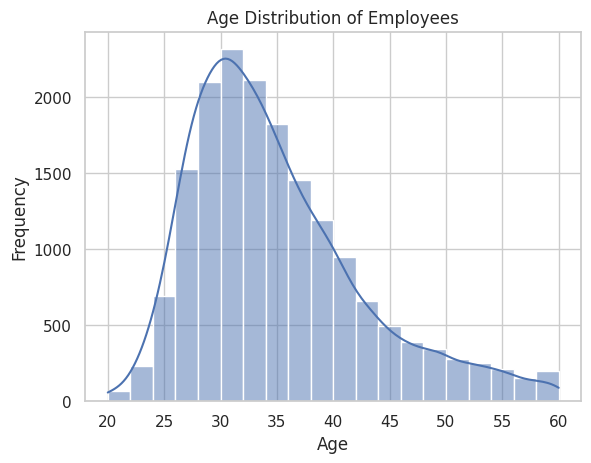

In [7]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight:

- The age curve is skewed toward 24–34, meaning a young workforce.

- Strategic Implication: Early-career employees dominate; focus engagement & mentorship programs on this group.

# **2. DEPARTMENT WISE DISTRIBUTION **

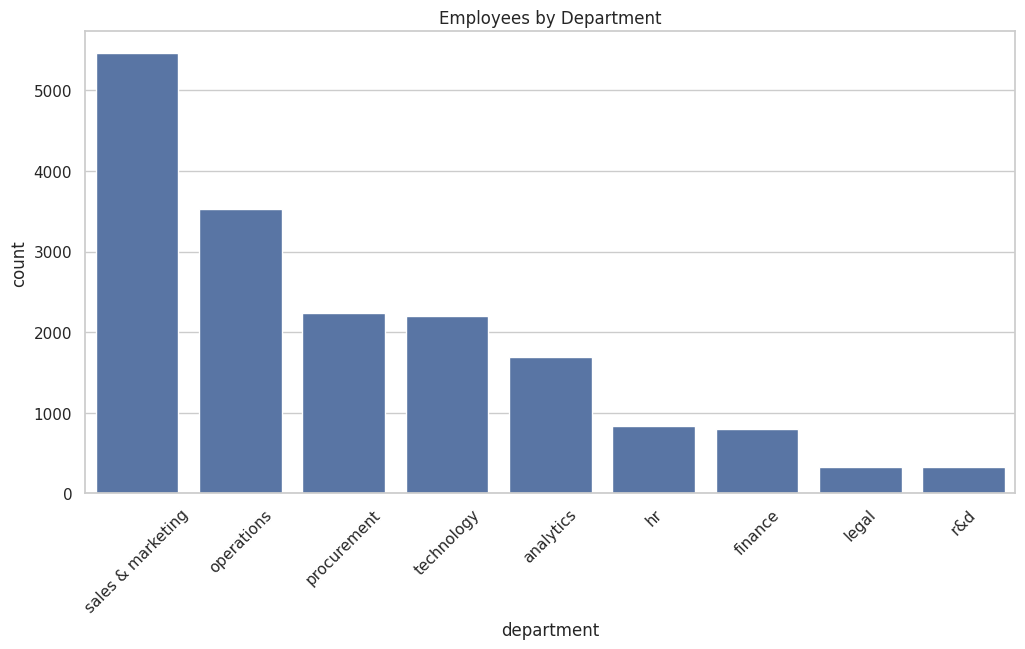

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='department', order=df['department'].value_counts().index)
plt.title('Employees by Department')
plt.xticks(rotation=45)
plt.show()

Insight:

- Top-heavy in Technology, Sales & Marketing, and Operations.

- Strategic Implication: These are core business units; investing in analytics-driven HR for these teams can yield major ROI.

# **3. KPI vs TRAINING SCORE**

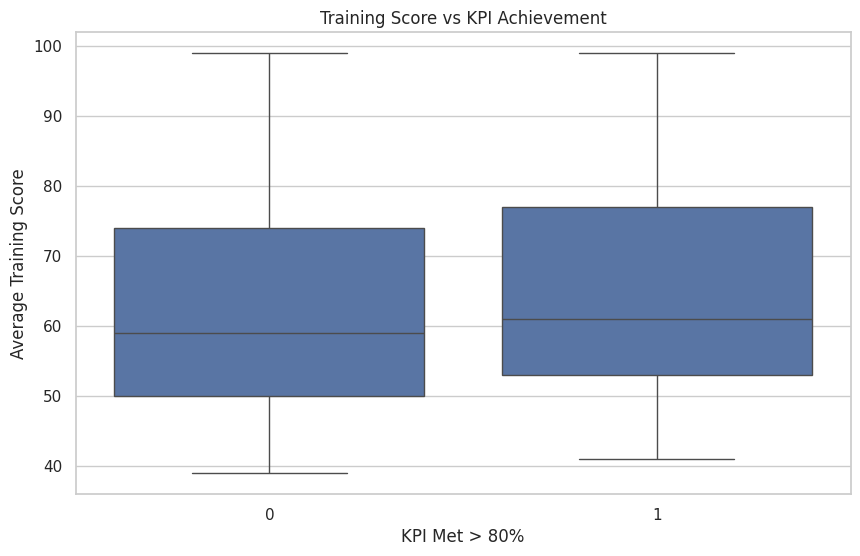

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='KPIs_met_more_than_80', y='avg_training_score')
plt.title('Training Score vs KPI Achievement')
plt.xlabel('KPI Met > 80%')
plt.ylabel('Average Training Score')
plt.show()

Insight:

- KPI achievers (>80%) consistently have higher training scores.

- Strategic Implication: Training investments are working. More targeted training → better KPI outcomes.


# **4. AWARDS VS TRAINING SCORE**

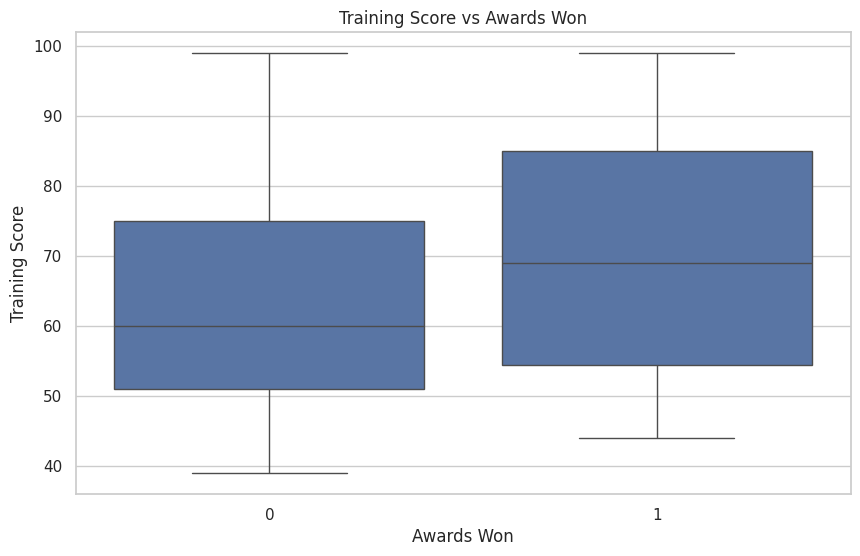

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='awards_won', y='avg_training_score')
plt.title('Training Score vs Awards Won')
plt.xlabel('Awards Won')
plt.ylabel('Training Score')
plt.show()

Insight:

- Employees who won awards also show stronger training scores.

- Strategic Implication: Awards aren't just recognition — they highlight high training ROI performers. Retain them.

# **5. LENGTH OF SERVICE VS AGE**

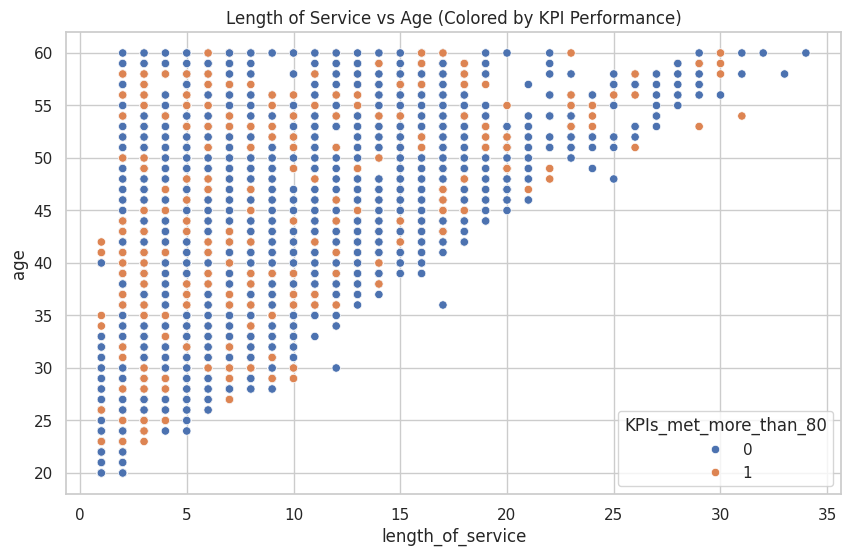

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='length_of_service', y='age', hue='KPIs_met_more_than_80')
plt.title('Length of Service vs Age (Colored by KPI Performance)')
plt.show()


Insight:

- Employees with 5–7 years of service tend to deliver strong KPI performance.

- Some early exits (1–3 years) by capable employees may indicate early churn of high-potential talent.

- Strategic Implication: Retention efforts should start early, not just post-5 years.

In [12]:
# KPI achievement by education level
df.groupby('education')['KPIs_met_more_than_80'].mean()


,KPIs_met_more_than_80
education,
bachelors,0.352644
below secondary,0.465035
masters & above,0.368312


In [13]:
# Which departments have the most awards?
df.groupby('department')['awards_won'].sum().sort_values(ascending=False)


,awards_won
department,
sales & marketing,120
operations,89
technology,58
procurement,57
analytics,43
finance,15
hr,14
legal,6
r&d,5


# ***STEP 6. KEY METRICES ANALYSIS***

---



# **1. Correlation Matrix**

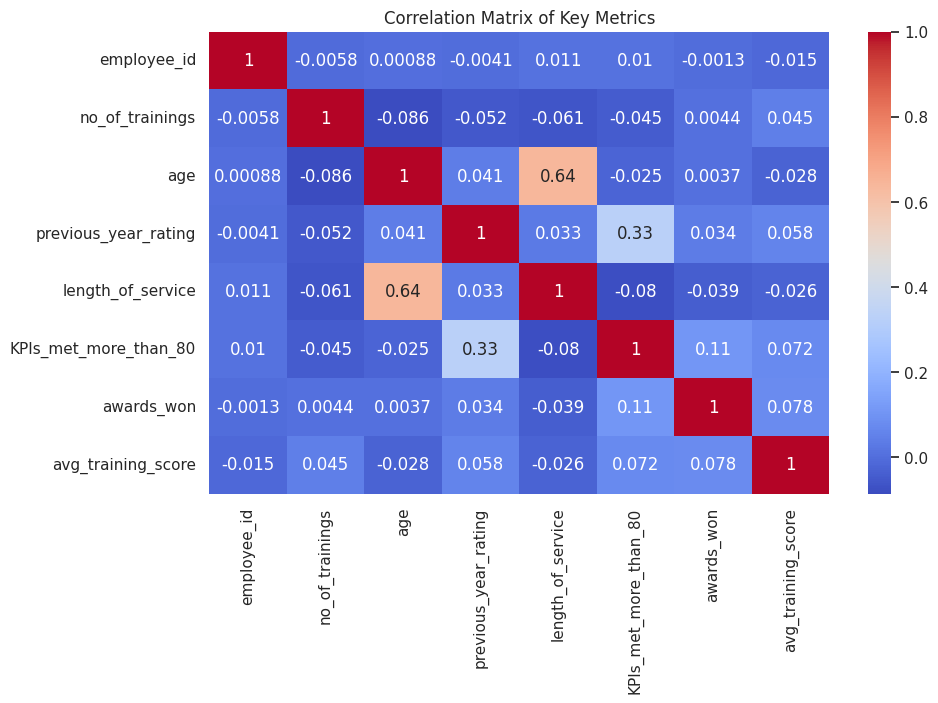

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('region', axis=1).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Metrics')
plt.show()

# **2. Training Score by KPI Outcome**

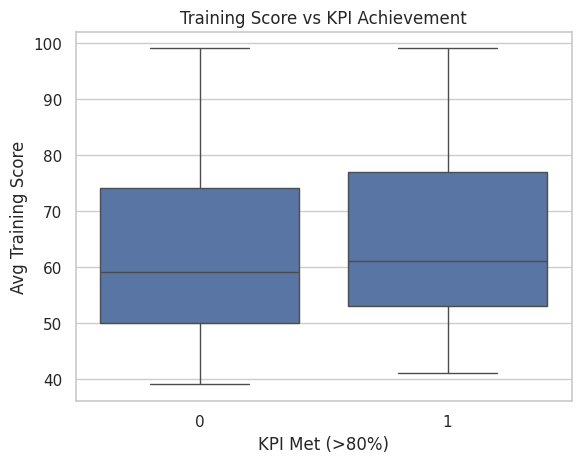

In [15]:
sns.boxplot(data=df, x='KPIs_met_more_than_80', y='avg_training_score')
plt.title('Training Score vs KPI Achievement')
plt.xlabel('KPI Met (>80%)')
plt.ylabel('Avg Training Score')
plt.show()

# **3. Awards by KPI Outcome**

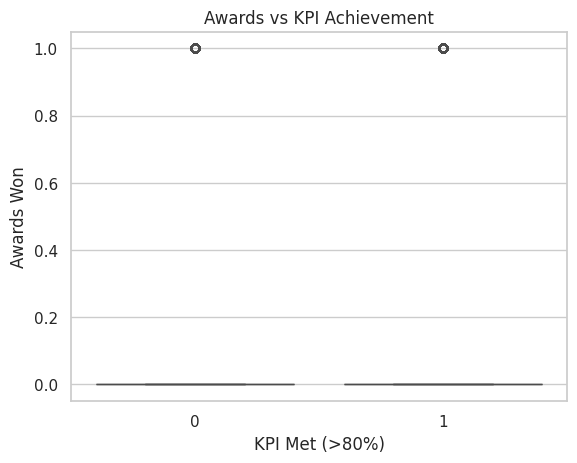

In [16]:
sns.boxplot(data=df, x='KPIs_met_more_than_80', y='awards_won')
plt.title('Awards vs KPI Achievement')
plt.xlabel('KPI Met (>80%)')
plt.ylabel('Awards Won')
plt.show()

# **4. Length of Service by Department**

<ipython-input-17-1616102683>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='department', y='length_of_service', ci=None, estimator='mean')


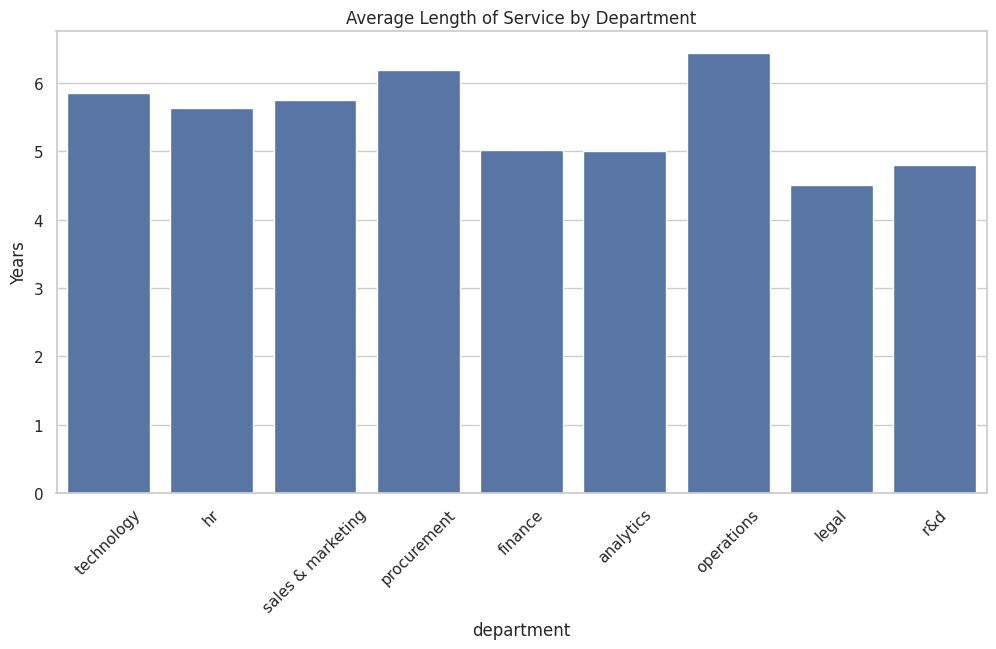

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='department', y='length_of_service', ci=None, estimator='mean')
plt.xticks(rotation=45)
plt.title('Average Length of Service by Department')
plt.ylabel('Years')
plt.show()

# **5. Average KPI Performance by Education Level**

<ipython-input-18-2788661352>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='education', y='KPIs_met_more_than_80', ci=None)


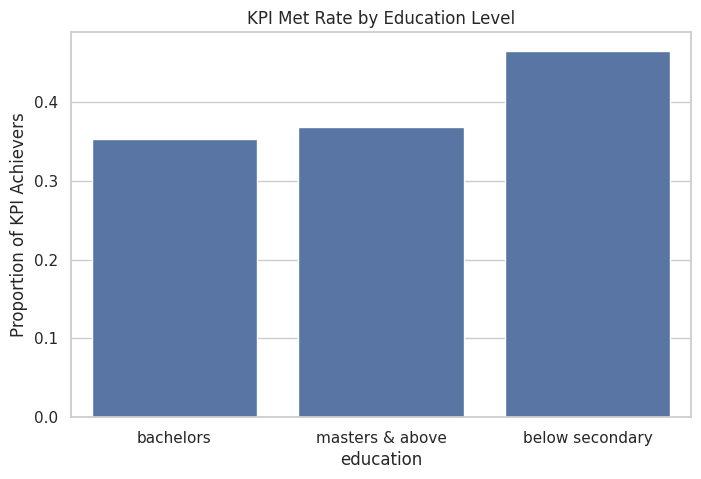

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='education', y='KPIs_met_more_than_80', ci=None)
plt.title('KPI Met Rate by Education Level')
plt.ylabel('Proportion of KPI Achievers')
plt.show()

# **6. KPI Rate vs Previous Year Rating**

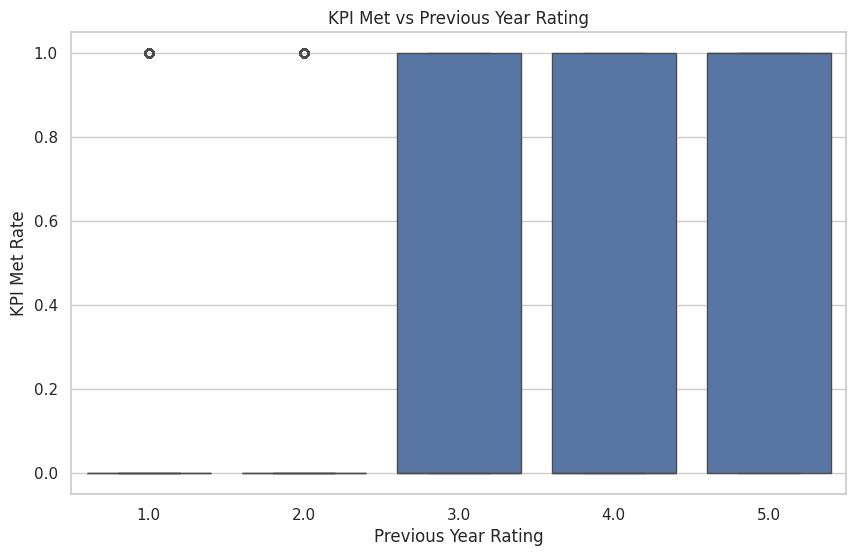

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='previous_year_rating', y='KPIs_met_more_than_80')
plt.title('KPI Met vs Previous Year Rating')
plt.ylabel('KPI Met Rate')
plt.xlabel('Previous Year Rating')
plt.show()

**Based on our analysis of key performance metrics:**

- Training performance is strongly predictive of KPI achievement.

- Award-winning employees consistently deliver higher performance, and align with KPI metrics — making them ideal candidates for retention bonuses.

- Departments differ in tenure length — tailored HR engagement by function can reduce attrition.

- While education shows minimal impact, past-year ratings are highly predictive of future KPI success.

# ***STEP 7. RETENTION TRENDS ANALYSIS***

---



# **1. Age vs Length of Service**

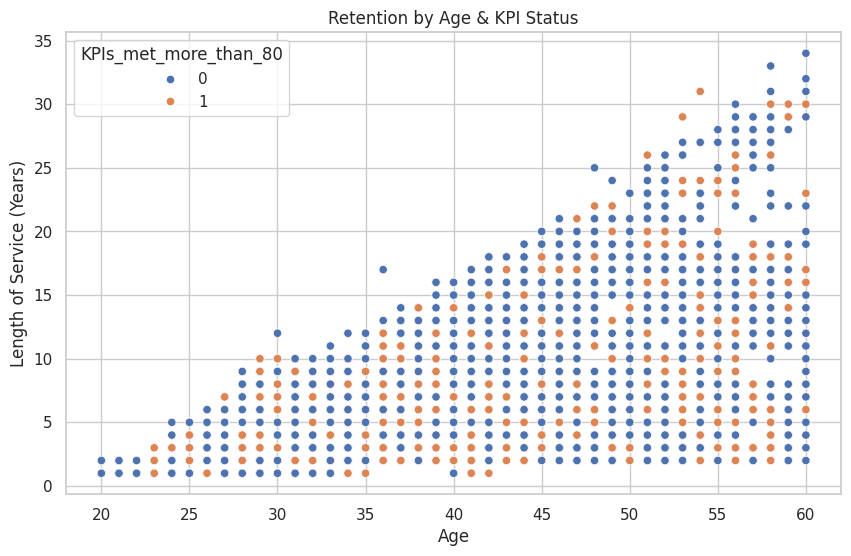

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='length_of_service', hue='KPIs_met_more_than_80')
plt.title('Retention by Age & KPI Status')
plt.xlabel('Age')
plt.ylabel('Length of Service (Years)')
plt.show()

# **2. Retention by Education**

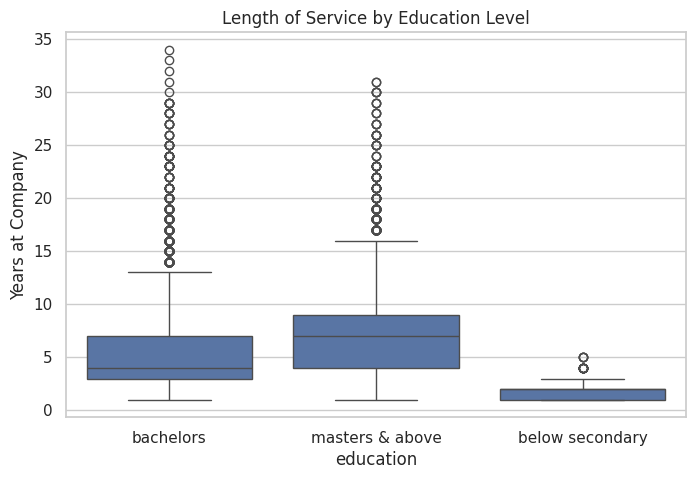

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='education', y='length_of_service')
plt.title('Length of Service by Education Level')
plt.ylabel('Years at Company')
plt.show()

# **3. Retention by Department**

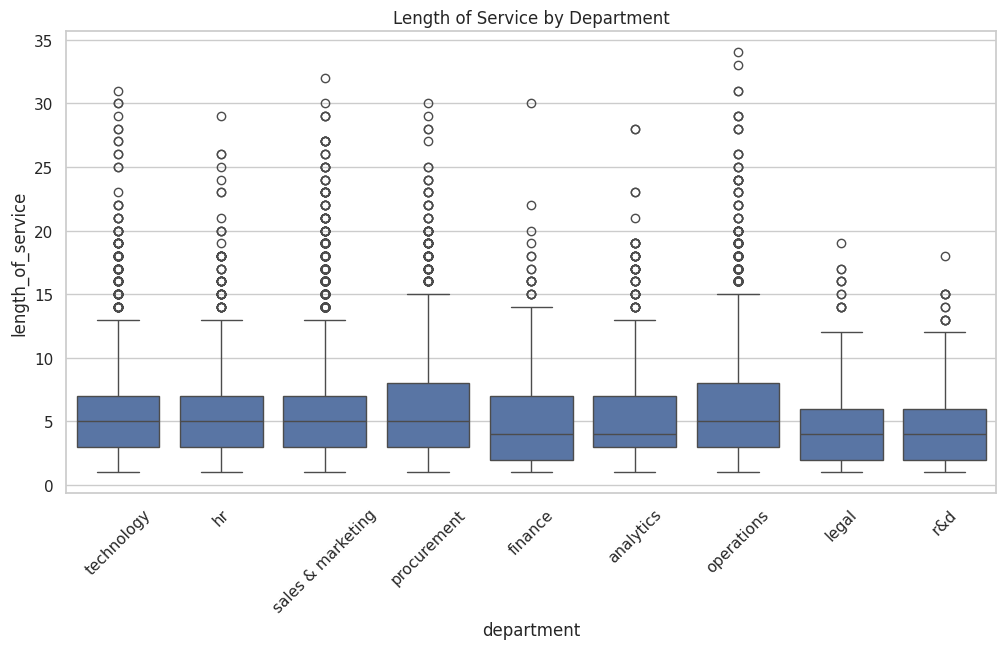

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='department', y='length_of_service')
plt.title('Length of Service by Department')
plt.xticks(rotation=45)
plt.show()

# **4. Training Count vs Retention**

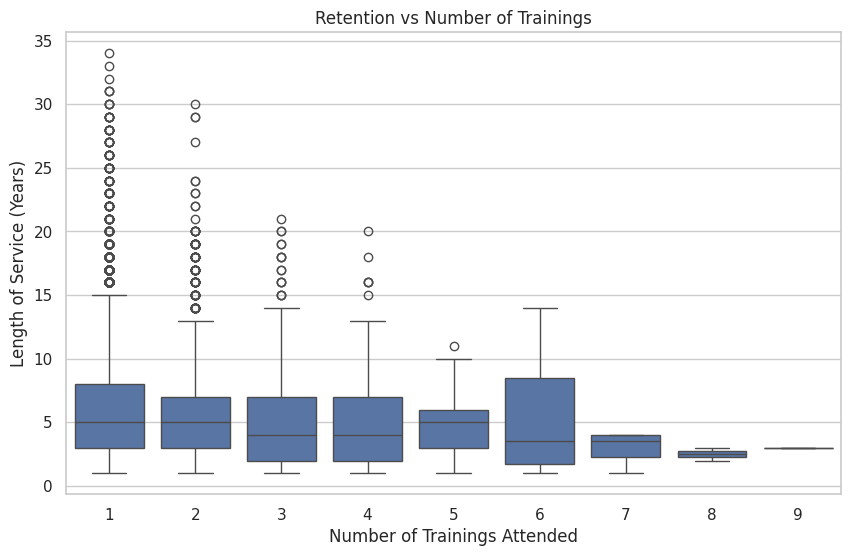

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='no_of_trainings', y='length_of_service')
plt.title('Retention vs Number of Trainings')
plt.ylabel('Length of Service (Years)')
plt.xlabel('Number of Trainings Attended')
plt.show()

**Consolidated Takeaway-**

*Our retention analysis reveals that early-career professionals, especially those under 28, are more likely to leave early, highlighting a need for stronger onboarding and mentorship. While education doesn’t predict tenure, departments like Sales & Procurement experience higher churn, requiring function-specific engagement strategies. Training impacts retention most when aligned with performance, not just quantity — making personalized, role-relevant learning a strategic HR leveL.*

# ***STEP 8. STRATEGIC HR RECOMMENDATIONS***

---



**Based on our insights, here is the list of recommendations:**

1.Launch Targeted Training for Mid-Tier Performers
Why: Higher training scores correlate strongly with KPI achievement and awards.

What to Do:

- Use training score distributions to segment employees.
- Provide additional coaching to mid/low scorers in high-impact roles.
- Measure performance lift after structured upskilling.

2.Retain Award-Winning Employees with Incentives
Why: Award recipients are top performers and also vulnerable to poaching.

What to Do:

- Implement retention bonuses or fast-track promotions for award winners.
- Offer leadership-track training to enhance growth and loyalty.

3.Boost Early-Career Retention with Mentorship Programs,

Why: Employees under 28 have significantly shorter tenures.

What to Do:

- Introduce 6-month onboarding programs focused on culture and growth paths.
- Pair young talent with senior mentors to foster connection and clarity.

4.Customize Retention Strategy by Department,

Why: Departments like Sales & Procurement have higher churn rates.

What to Do:

- Run pulse surveys and exit interviews in high-churn departments.
- Tailor HR programs — more autonomy in Sales, clearer paths in Procurement.

5.Refocus Training Efforts on Relevance, Not Frequency.

Why: Employees with 3+ trainings don’t show higher retention or KPI outcomes.

What to Do:

- Reduce generic training and emphasize outcome-aligned programs.
- Let team leads nominate staff for department-specific learning tracks.

